In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
import scipy
import random
import dataframe_image as dfi
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/mateu/Desktop/Semestr 4/Statystyka stosowana/PSID1982.csv",
                  sep=",",
                  index_col=0)
df

,experience,weeks,occupation,industry,south,smsa,married,gender,union,education,ethnicity,wage
1,9,32,white,yes,yes,no,yes,male,no,9,other,515
2,36,30,blue,yes,no,no,yes,male,no,11,other,912
3,12,46,blue,yes,no,no,no,male,yes,12,other,954
4,37,46,blue,no,no,yes,no,female,no,10,afam,751
5,16,49,white,no,no,no,yes,male,no,16,other,1474
...,...,...,...,...,...,...,...,...,...,...,...,...
591,40,46,blue,yes,no,yes,yes,male,yes,8,other,950
592,12,47,blue,yes,no,yes,yes,male,yes,13,other,1166
593,16,40,blue,no,yes,no,no,male,no,8,afam,292
594,13,47,blue,yes,no,yes,yes,male,yes,12,other,1150


In [23]:
head = df.head(n=6)   # return the first n rows, default n=5
head

,experience,weeks,occupation,industry,south,smsa,married,gender,union,education,ethnicity,wage
1,9,32,white,yes,yes,no,yes,male,no,9,other,515
2,36,30,blue,yes,no,no,yes,male,no,11,other,912
3,12,46,blue,yes,no,no,no,male,yes,12,other,954
4,37,46,blue,no,no,yes,no,female,no,10,afam,751
5,16,49,white,no,no,no,yes,male,no,16,other,1474
6,32,47,blue,yes,no,yes,yes,male,no,12,other,1539


In [5]:
dfi.export(head, "head2.png", table_conversion="matplotlib", max_rows=6)

# SOUTH 

In [25]:
df_south_y = df.loc[df["south"]=="yes"]
df_south_n = df.loc[df["south"]=="no"]

In [54]:
df_south_y

,experience,weeks,occupation,industry,south,smsa,married,gender,union,education,ethnicity,wage
1,9,32,white,yes,yes,no,yes,male,no,9,other,515
9,9,48,white,no,yes,yes,yes,male,no,16,other,1350
10,9,40,white,no,yes,yes,yes,male,no,16,other,845
12,27,46,blue,no,yes,yes,yes,male,yes,12,other,1156
13,32,46,blue,no,yes,yes,yes,male,no,12,other,1636
...,...,...,...,...,...,...,...,...,...,...,...,...
574,10,48,blue,no,yes,no,yes,male,no,12,other,1070
579,9,51,white,no,yes,yes,no,female,no,16,other,823
586,20,30,blue,yes,yes,no,yes,male,no,10,other,400
588,7,50,white,no,yes,yes,yes,male,no,16,other,900


In [33]:
dfs1 = pd.DataFrame(df_south_y["wage"].describe()).rename(columns={"wage":"South resident"})
dfs2 = pd.DataFrame(df_south_n["wage"].describe()).rename(columns={"wage":"Not a south resident"})
dfs = pd.concat([dfs1, dfs2], axis=1)
dfs

,South resident,Not a south resident
count,174.000000,421.000000
mean,1015.350575,1202.878860
std,500.519104,534.225538
min,292.000000,313.000000
25%,650.000000,860.000000
50%,941.500000,1129.000000
75%,1200.000000,1425.000000
max,3125.000000,5100.000000


In [34]:
dfi.export(dfs, "dfs.png", table_conversion="matplotlib")

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


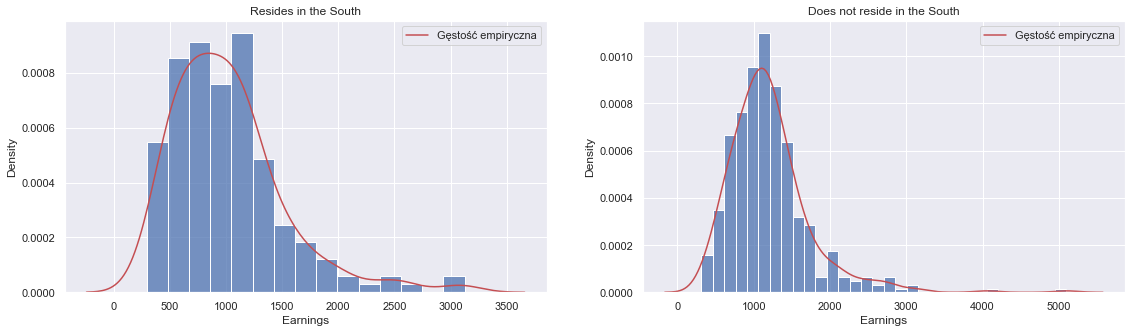

In [97]:
sns.set(rc={"figure.figsize": (19, 5)})

subplot(1,2,1)
sns.histplot(df_south_y["wage"], stat="density").set(title="Resides in the South")
sns.kdeplot(df_south_y["wage"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.legend()

subplot(1,2,2)
sns.histplot(df_south_n["wage"], stat="density").set(title="Does not reside in the South")
sns.kdeplot(df_south_n["wage"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.legend()

#plt.savefig("histogramy2.pdf", format="pdf", bbox_inches="tight")

# MARRIED

In [60]:
df_married_y = df.loc[df["married"]=="yes"]
df_married_n = df.loc[df["married"]=="no"]

In [61]:
df_married_n

,experience,weeks,occupation,industry,south,smsa,married,gender,union,education,ethnicity,wage
3,12,46,blue,yes,no,no,no,male,yes,12,other,954
4,37,46,blue,no,no,yes,no,female,no,10,afam,751
15,15,48,white,no,no,no,no,female,no,14,other,650
16,22,49,blue,no,yes,yes,no,female,no,12,afam,595
24,11,50,blue,no,no,no,no,female,no,12,other,350
...,...,...,...,...,...,...,...,...,...,...,...,...
570,14,48,blue,no,no,yes,no,female,no,12,other,580
579,9,51,white,no,yes,yes,no,female,no,16,other,823
582,8,51,blue,no,no,yes,no,male,no,12,other,1056
593,16,40,blue,no,yes,no,no,male,no,8,afam,292


In [ ]:
hmean_m = scipy.stats.hmean(dfm1["wage"])
hmean_g = scipy.stats.gmean(dfm2["wage"])

In [67]:
dfm1 = pd.DataFrame(df_married_y["wage"].describe()).rename(columns={"wage":"Married"})
dfm2 = pd.DataFrame(df_married_n["wage"].describe()).rename(columns={"wage":"Not married"})

hmean_m_y = scipy.stats.hmean(df_married_y["wage"])
gmean_m_y = scipy.stats.gmean(df_married_y["wage"])
hmean_m_n = scipy.stats.hmean(df_married_n["wage"])
gmean_m_n = scipy.stats.gmean(df_married_n["wage"])

data1 = {"harmonic mean":[hmean_m_y, hmean_m_n], "geometric mean":[gmean_m_y,gmean_m_n]}
data2 = pd.DataFrame(data1).T
data2.columns = ["Married","Not married"]


dfm12 = pd.concat([dfm1, dfm2], axis=1)
dfm = pd.concat([dfm12, data2], axis=0)
dfm

,Married,Not married
count,479.000000,116.000000
mean,1214.745303,872.586207
std,532.054738,430.268027
min,313.000000,292.000000
25%,872.000000,578.750000
50%,1137.000000,771.500000
75%,1419.000000,1090.750000
max,5100.000000,3042.000000
harmonic mean,1031.586166,706.029893
geometric mean,1118.915372,783.907880


In [100]:
dfi.export(dfm, "dfm.png", table_conversion="matplotlib")

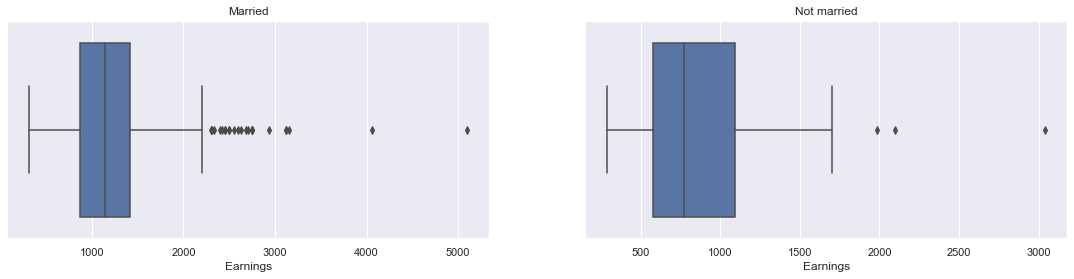

In [98]:
sns.set(rc={"figure.figsize": (19, 4)})

subplot(1,2,1)
sns.boxplot(x = df_married_y["wage"]).set(title="Married")
plt.xlabel("Earnings")

subplot(1,2,2)
sns.boxplot(x = df_married_n["wage"]).set(title="Not married")
plt.xlabel("Earnings")

plt.savefig("boxplot2.pdf", format="pdf", bbox_inches="tight")

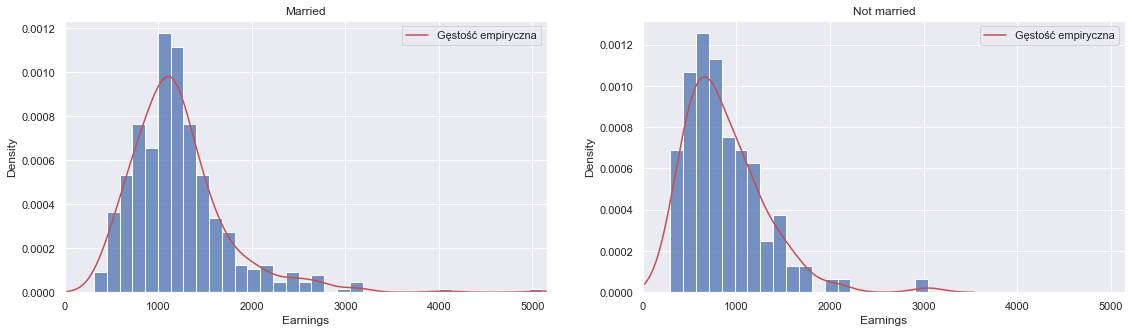

In [101]:
sns.set(rc={"figure.figsize": (19, 5)})

subplot(1,2,1)
sns.histplot(df_married_y["wage"], stat="density").set(title="Married")
sns.kdeplot(df_married_y["wage"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.xlim([0,5150])
plt.legend()

subplot(1,2,2)
sns.histplot(df_married_n["wage"], stat="density", bins=20).set(title="Not married")
sns.kdeplot(df_married_n["wage"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.xlim([0,5150])
plt.legend()

plt.savefig("histogramy2.pdf", format="pdf", bbox_inches="tight")

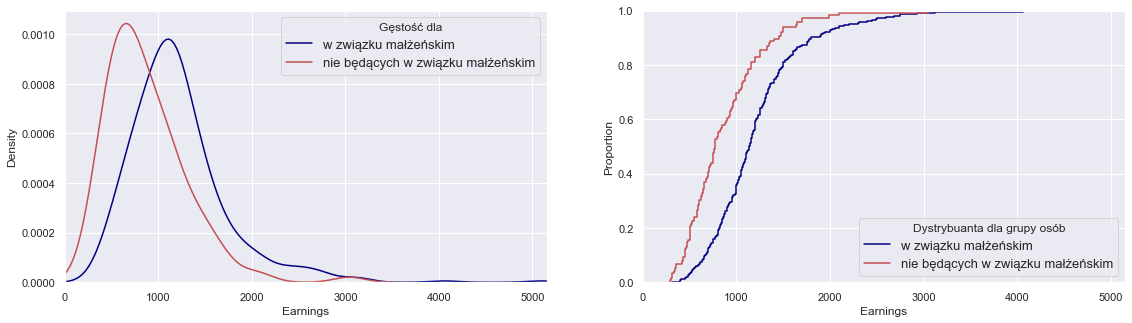

In [109]:
sns.set(rc={"figure.figsize": (19, 5)})

subplot(1,2,1)
sns.kdeplot(df_married_y["wage"], color="navy", label="w związku małżeńskim")
sns.kdeplot(df_married_n["wage"], color="r", label="nie będących w związku małżeńskim")

plt.xlabel("Earnings")
plt.xlim([0,5150])
plt.legend(title="Gęstość dla", loc="upper right", fontsize=13)


subplot(1,2,2)
sns.ecdfplot(df_married_y["wage"], color="navy", label="w związku małżeńskim")
sns.ecdfplot(df_married_n["wage"], color="r", label="nie będących w związku małżeńskim")

plt.xlabel("Earnings")
plt.xlim([0,5150])
plt.legend(title="Dystrybuanta dla grupy osób", loc="lower right", fontsize=13)
plt.savefig("gd2.pdf", format="pdf", bbox_inches="tight")

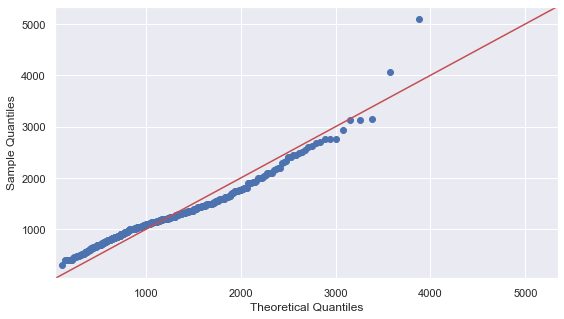

In [122]:
sns.set(rc={"figure.figsize": (9, 5)})
sm.qqplot(df_married_y["wage"], dist=scipy.stats.gamma(3.4,0,350), line='45');

#plt.savefig("qqplot2.pdf", format="pdf", bbox_inches="tight")